## Task # 4 - To Explore Decision Tree Algorithm

#### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10Yi wK-/view?usp=sharing 

### Let’s take a look at how we could go about implementing a decision tree classifier in Python. To begin, we import the following libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
from pydotplus import graph_from_dot_data

### For this task, we’ll be working with what has to be the most popular dataset in the field of machine learning, the iris dataset from UC Irvine Machine Learning Repository.

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

### In the proceeding section, we’ll attempt to build a decision tree classifier to determine the kind of flower given its dimensions.

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Although, decision trees can handle categorical data, we still encode the targets in terms of digits (i.e. setosa=0, versicolor=1, virginica=2) in order to create a confusion matrix at a later point. Fortunately, the pandas library provides a method for this very purpose.

In [4]:
y = pd.get_dummies(y)

### We’ll want to evaluate the performance of our model. Therefore, we set a quarter of the data aside for testing.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Next, we create and train an instance of the DecisionTreeClassifer class. We provide the y values because our model uses a supervised machine learning algorithm.

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### We can view the actual decision tree produced by our model by running the following block of code.

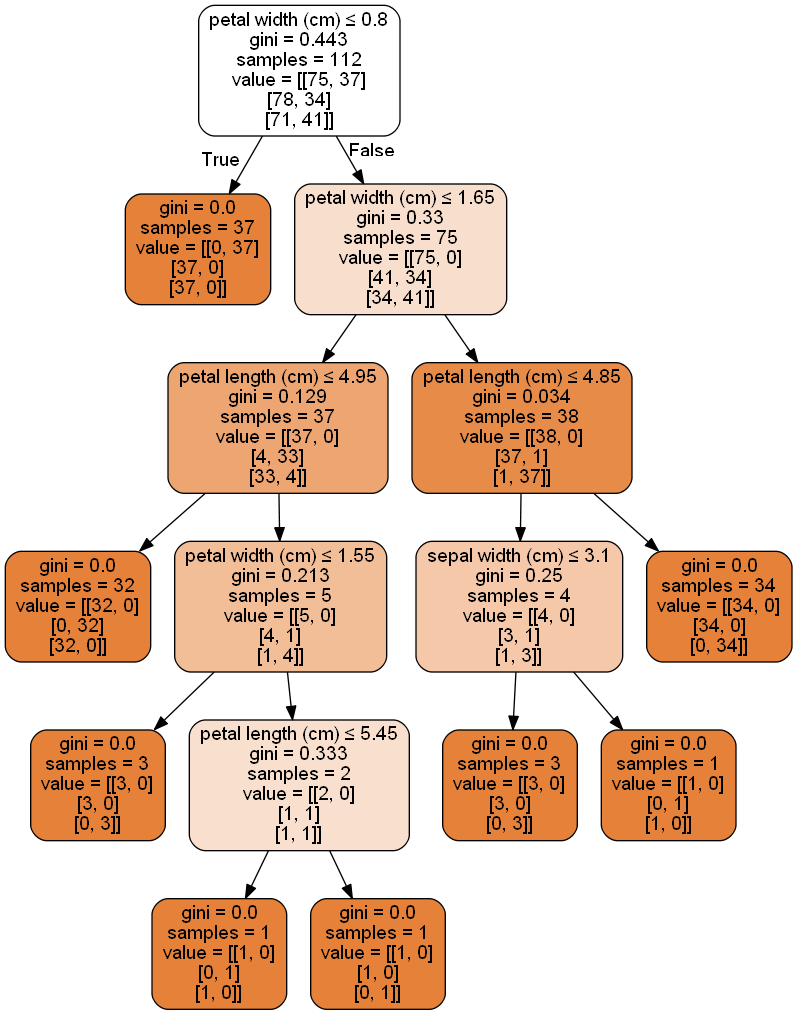

In [7]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names,filled=True, rounded=True,
                special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Let’s see how our decision tree does when its presented with test data.

In [8]:
y_pred = dt.predict(X_test)
y_pred[0:5]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

### If this were a regression problem, we’d use some kind of loss function such as Mean Square Error (MSE). However, since this is a classification problem, we make use of a confusion matrix to gauge the accuracy of our model.

In [9]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### The numbers on the diagonal of the confusion matrix correspond to correct predictions. When there are more than two potential outcomes, we simply extend the number of columns and rows in the confusion matrix. As we can see, our decision tree classifier correctly classified 37/38 plants.

In [10]:
print('test score =',accuracy_score(y_test, dt.predict(X_test)) * 100)
print('train score =',accuracy_score(y_train, dt.predict(X_train)) * 100)

test score = 97.36842105263158
train score = 100.0


### Decision Trees are easy to interpret, don’t require any normalization, and can be applied to both regression and classification problems. Unfortunately, Decision Trees are seldom used in practice because they don’t generalize well.